# Reconocimiento de Actividades Humanas

En este laboratorio usaremos registro de actividades capturado por smartphones que fueron desarrolladas por 30 personas distintas. Entre las actividades se incluyen:

    1 WALKING
    2 WALKING_UPSTAIRS
    3 WALKING_DOWNSTAIRS
    4 SITTING
    5 STANDING
    6 LAYING

Al mismo tiempo, cada registro de la base de datos incluye las siguientes mediciones:ç

-  Aceleracion total y aceleracion del cuerpo estimada en los 3 ejes (X-Y-Z)
-  Velocidad angular del giroscopio en 3 los ejes (X-Y-Z)
-  Un vector de dimensionalidad 561 con descriptores derivados a partir de los datos de movimiento.
-  Etiqueta de actividad
-  Un identificador de la persona que ejecuta la actividad

Los datos originales se pueden encontrar en [este enlace](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones#)

Más información del dataset se encuentra en:

- Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013. 

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False


print('Google Colab? ',IS_COLAB)

Google Colab?  False


In [2]:
!ls HAR

x_test.npy  x_train.npy  y_test.npy  y_train.npy


In [3]:
if not IS_COLAB:
    ! wget  -c "https://ucmcl-my.sharepoint.com/:u:/g/personal/shernandez_ucm_cl/EWvE2qLEt7lGkusfUcjYHnMBbtVOqIrdzY15Dnd2hHDUJA?e=NAeghv&download=1" -O HAR.tar.xz
    ! tar -xf HAR.tar.xz 

--2021-11-10 18:05:26--  https://ucmcl-my.sharepoint.com/:u:/g/personal/shernandez_ucm_cl/EWvE2qLEt7lGkusfUcjYHnMBbtVOqIrdzY15Dnd2hHDUJA?e=NAeghv&download=1
Resolviendo ucmcl-my.sharepoint.com (ucmcl-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Conectando con ucmcl-my.sharepoint.com (ucmcl-my.sharepoint.com)[13.107.136.9]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: /personal/shernandez_ucm_cl/Documents/HAR.tar.xz [siguiente]
--2021-11-10 18:05:26--  https://ucmcl-my.sharepoint.com/personal/shernandez_ucm_cl/Documents/HAR.tar.xz
Reutilizando la conexión con ucmcl-my.sharepoint.com:443.
Petición HTTP enviada, esperando respuesta... 416 REQUESTED RANGE NOT SATISFIABLE

    El archivo ya se ha obtenido por completo; no hay nada que hacer.



In [4]:
! ls HAR

x_test.npy  x_train.npy  y_test.npy  y_train.npy


In [4]:
import numpy as np

X_train=np.load('HAR/x_train.npy')
X_test=np.load('HAR/x_test.npy')
y_train=np.load('HAR/y_train.npy')
y_test=np.load('HAR/y_test.npy')

label_to_activity = {1: 'walking horizontally', 2: 'walking upstairs', 3: 'walking downstairs',
                     4: 'sitting', 5: 'standing', 6: 'laying'}

In [5]:
y_train.shape

(7352, 1)

In [6]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [7]:
print(X_train.shape)

(7352, 128, 9)


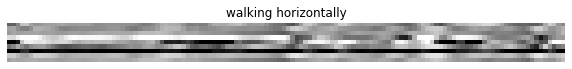

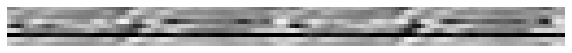

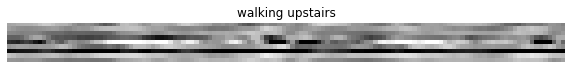

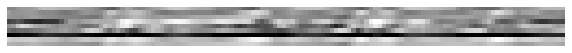

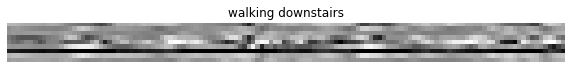

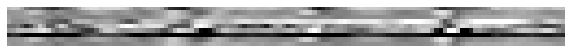

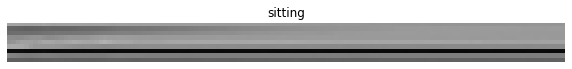

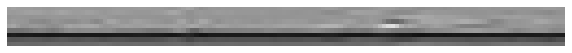

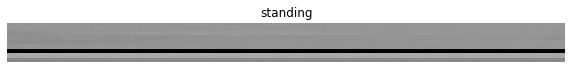

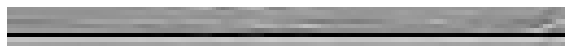

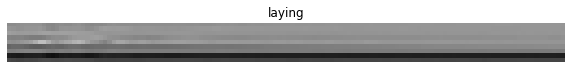

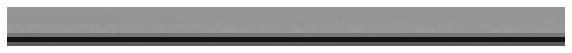

In [8]:
import matplotlib.pyplot as plt

def make_plots(num_examples_per_category):
    for label in range(1,7):
        x_label = X_train[y_train[:, 0] == label]
        for i in range(num_examples_per_category):
            fig, ax = plt.subplots(figsize=(10, 1))
            ax.imshow(x_label[100*i].T, cmap='Greys', vmin=-1, vmax=1)
            ax.axis('off')
            if i == 0:
                ax.set_title(label_to_activity[label])
            plt.show()
        
make_plots(2)

In [9]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dense

model = keras.models.Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(32,activation="relu"),
    Dense(6,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                36896     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 37,094
Trainable params: 37,094
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_train_onehot=to_categorical(y_train-1)
y_test_onehot=to_categorical(y_test-1)

In [12]:
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
history = model.fit(X_train, y_train_onehot,batch_size=512,epochs=100, verbose=1,validation_data=(X_test, y_test_onehot))
score = model.evaluate(X_test, y_test_onehot, verbose=0)

Epoch 1/100
15/15 [==============================] - 1s 31ms/step - loss: 1.7196 - accuracy: 0.3081 - val_loss: 1.2442 - val_accuracy: 0.5484
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.1436 - accuracy: 0.5836 - val_loss: 1.1180 - val_accuracy: 0.5819
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9875 - accuracy: 0.6474 - val_loss: 1.0903 - val_accuracy: 0.6264
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9077 - accuracy: 0.6908 - val_loss: 1.0541 - val_accuracy: 0.6356
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8348 - accuracy: 0.7278 - val_loss: 1.0273 - val_accuracy: 0.6688
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7684 - accuracy: 0.7625 - val_loss: 0.9558 - val_accuracy: 0.6854
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.7836 - val_loss: 0.9028 - val_accuracy: 0.7319
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1632 - accuracy: 0.9462 - val_loss: 0.5241 - val_accuracy: 0.8551
Epoch 60/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.9414 - val_loss: 0.5233 - val_accuracy: 0.8504
Epoch 61/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9476 - val_loss: 0.5278 - val_accuracy: 0.8521
Epoch 62/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1615 - accuracy: 0.9515 - val_loss: 0.5293 - val_accuracy: 0.8565
Epoch 63/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1569 - accuracy: 0.9484 - val_loss: 0.5290 - val_accuracy: 0.8595
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1602 - accuracy: 0.9412 - val_loss: 0.5252 - val_accuracy: 0.8510
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1615 - accuracy: 0.9432 - val_loss: 0.5292 - val_accuracy: 0.8616
Epoch 

In [13]:
print('validation loss : {0:0.2f}, validation accuracy : {1:0.2f}'.format(*score))

validation loss : 0.55, validation accuracy : 0.86


Text(0.5, 1.0, 'accuracy')

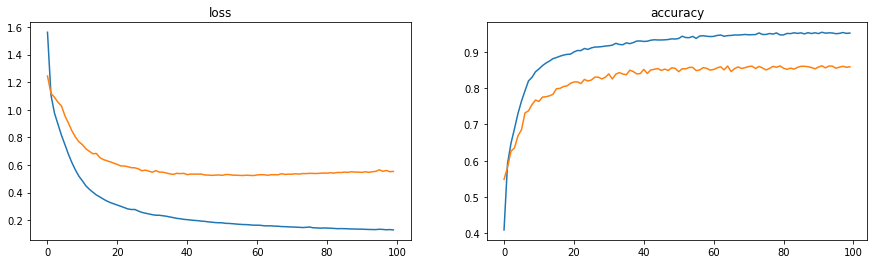

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')

In [15]:
from tensorflow.keras.layers import Flatten,Dense,SimpleRNN

rnn_model = keras.models.Sequential([
    SimpleRNN(32, return_sequences=True, input_shape=X_train.shape[1:]),
    SimpleRNN(32),
    Dense(6,activation="softmax")
])

In [16]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128, 32)           1344      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 3,622
Trainable params: 3,622
Non-trainable params: 0
_________________________________________________________________


In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
rnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = rnn_model.fit(X_train, y_train_onehot,batch_size=512,epochs=20, verbose=1,validation_data=(X_test, y_test_onehot))
score = rnn_model.evaluate(X_test, y_test_onehot, verbose=0)

Epoch 1/20
15/15 [==============================] - 3s 158ms/step - loss: 1.5034 - accuracy: 0.3435 - val_loss: 1.2116 - val_accuracy: 0.5287
Epoch 2/20
15/15 [==============================] - 2s 148ms/step - loss: 1.0737 - accuracy: 0.5610 - val_loss: 1.0325 - val_accuracy: 0.5568
Epoch 3/20
15/15 [==============================] - 2s 147ms/step - loss: 0.8277 - accuracy: 0.6488 - val_loss: 0.9750 - val_accuracy: 0.6064
Epoch 4/20
15/15 [==============================] - 2s 144ms/step - loss: 0.8642 - accuracy: 0.6397 - val_loss: 0.8285 - val_accuracy: 0.6522
Epoch 5/20
15/15 [==============================] - 2s 144ms/step - loss: 0.6738 - accuracy: 0.6992 - val_loss: 0.7064 - val_accuracy: 0.6552
Epoch 6/20
15/15 [==============================] - 2s 147ms/step - loss: 0.5837 - accuracy: 0.7268 - val_loss: 0.6944 - val_accuracy: 0.6851
Epoch 7/20
15/15 [==============================] - 2s 145ms/step - loss: 0.5599 - accuracy: 0.7401 - val_loss: 0.6948 - val_accuracy: 0.6899
Epoch 

In [18]:
print('validation loss : {0:0.2f}, validation accuracy : {1:0.2f}'.format(*score))

validation loss : 0.69, validation accuracy : 0.76


Text(0.5, 1.0, 'accuracy')

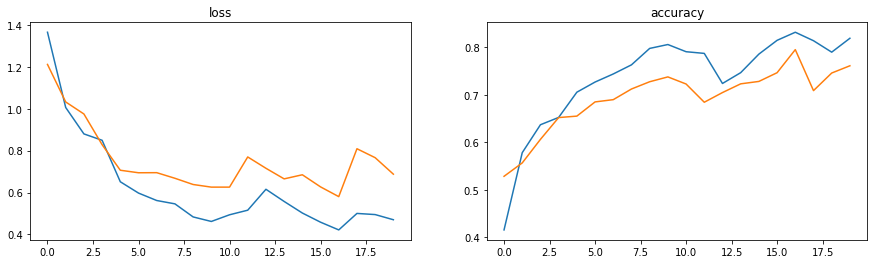

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')

In [13]:
from tensorflow.keras.layers import LSTM,Conv1D

lstm_model = keras.models.Sequential([
    LSTM(32,input_shape=X_train.shape[1:],unroll=True),
    Dense(6,activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)
lstm_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history = lstm_model.fit(X_train, y_train_onehot,batch_size=512,epochs=20, verbose=1,validation_data=(X_test, y_test_onehot))
score = lstm_model.evaluate(X_test, y_test_onehot, verbose=0)


Epoch 1/20
15/15 [==============================] - 15s 185ms/step - loss: 1.5359 - accuracy: 0.3029 - val_loss: 1.1637 - val_accuracy: 0.4788
Epoch 2/20
15/15 [==============================] - 1s 53ms/step - loss: 0.9986 - accuracy: 0.5699 - val_loss: 1.0918 - val_accuracy: 0.5534
Epoch 3/20
15/15 [==============================] - 1s 55ms/step - loss: 0.8918 - accuracy: 0.6433 - val_loss: 0.8612 - val_accuracy: 0.6264
Epoch 4/20
15/15 [==============================] - 1s 56ms/step - loss: 0.7594 - accuracy: 0.6800 - val_loss: 0.8618 - val_accuracy: 0.6580
Epoch 5/20
15/15 [==============================] - 1s 56ms/step - loss: 0.7632 - accuracy: 0.7041 - val_loss: 0.7549 - val_accuracy: 0.7136
Epoch 6/20
15/15 [==============================] - 1s 56ms/step - loss: 0.6591 - accuracy: 0.7466 - val_loss: 1.2926 - val_accuracy: 0.5881
Epoch 7/20
15/15 [==============================] - 1s 54ms/step - loss: 0.9739 - accuracy: 0.6135 - val_loss: 0.9806 - val_accuracy: 0.6301
Epoch 8/20


Text(0.5, 1.0, 'accuracy')

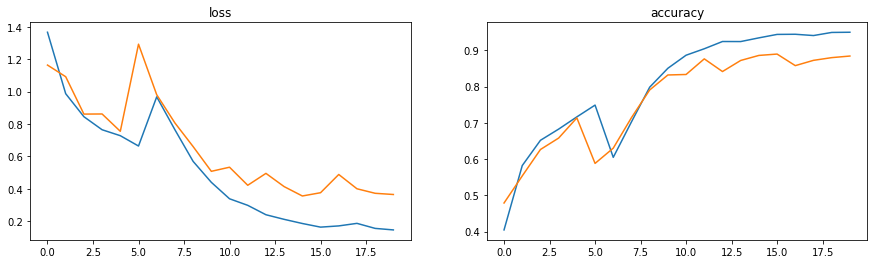

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')

In [12]:
X_train.shape[1:]

(128, 9)